In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 
import matplotlib as mpl

import re as re

import seaborn as sns

In [2]:
an = pd.read_csv('Analysis.csv')
an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 70 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        876 non-null    object 
 2   Is your employer primarily a tech company/organization?     

# Grouping Physical Category and Graph

36


<Axes: ylabel='Physical Category,Would you be willing to bring up a physical health issue with a potential employer in an interview?'>

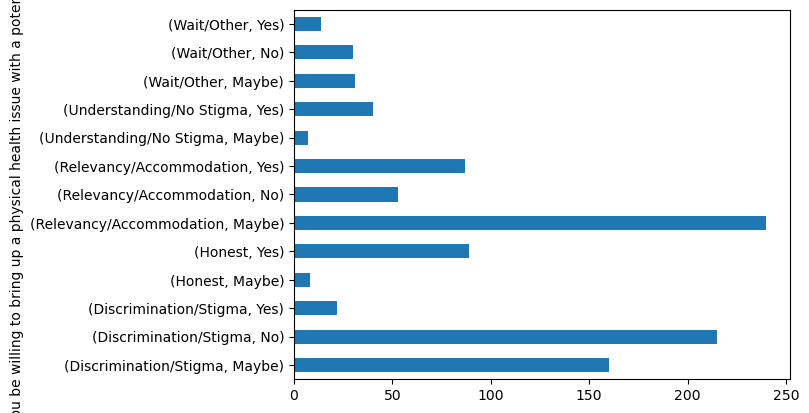

In [3]:
x = an.columns.get_loc('Would you be willing to bring up a physical health issue with a potential employer in an interview?')
print(x)
an.groupby(['Physical Category', an.iloc[:,36]]).size().plot(kind = 'barh')

# **Grouping Mental Category and Graph**

40


<Axes: ylabel='Mental Category,Would you bring up a mental health issue with a potential employer in an interview?'>

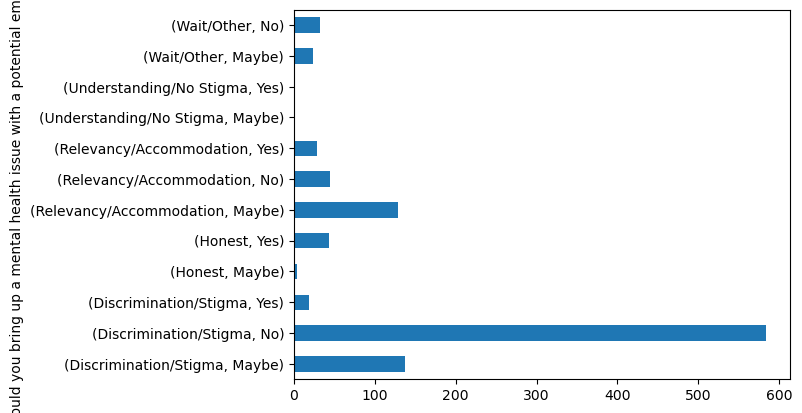

In [4]:
x = an.columns.get_loc('Would you bring up a mental health issue with a potential employer in an interview?')
print(x)
# an.groupby('Physical Category').an['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].count()
# print(an.groupby(['Mental Category', an.iloc[:,40]]).size())
an.groupby(['Mental Category', an.iloc[:,40]]).size().plot(kind = 'barh')

# Comparing Physical and Mental Categories

In [5]:
phyGroup = an.groupby(['Physical Category', an.iloc[:,36]]).size()

phyG = phyGroup.to_frame()
phyG = phyG.reset_index()
phyG = phyG.rename(columns={'Physical Category': 'Category'})
phyG['Category'] = phyG['Category'].astype(str) + '-' + phyG['Would you be willing to bring up a physical health issue with a potential employer in an interview?']
phyG = phyG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?'], axis=1)
# phyG.head(50)



mentGroup = an.groupby(['Mental Category', an.iloc[:,40]]).size()
mentG = mentGroup.to_frame()
mentG = mentG.reset_index()
mentG = mentG.rename(columns={'Mental Category': 'Category'})
mentG['Category'] = mentG['Category'].astype(str) + '-' + mentG['Would you bring up a mental health issue with a potential employer in an interview?']
mentG = mentG.drop(['Would you bring up a mental health issue with a potential employer in an interview?'], axis=1)
# mentG.head(50)


In [6]:
resultG = pd.merge(phyG, mentG, how='left',  on="Category")
resultG = resultG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultG.fillna(0, inplace=True) 
resultG = resultG.astype({'Mental':int})
# resultG.head(60)




c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


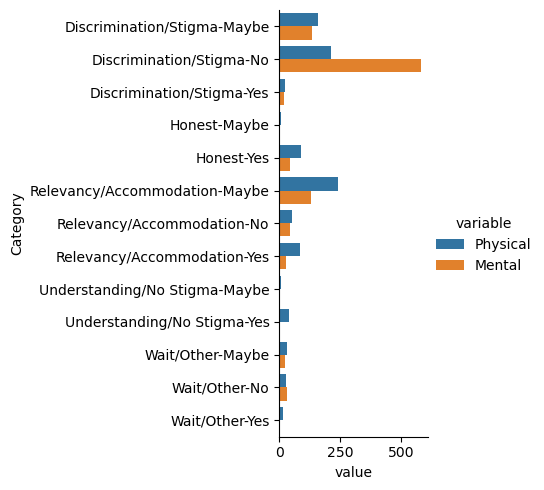

In [7]:
resultG1 = pd.melt(resultG, id_vars = "Category")
# print(result1)

ax = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resultG1, 
            kind='bar')
plt.show()

### Comparing Physical and Mental Categories with Gender

                          Category  variable  value
0   Discrimination/Stigma-Maybe--F  Physical     55
1      Discrimination/Stigma-No--F  Physical     60
2     Discrimination/Stigma-Yes--F  Physical      2
3   Discrimination/Stigma-Maybe--M  Physical    103
4      Discrimination/Stigma-No--M  Physical    147
..                             ...       ...    ...
63                Wait/Other-No--F    Mental     13
64               Wait/Other-Yes--F    Mental      0
65             Wait/Other-Maybe--M    Mental     19
66                Wait/Other-No--M    Mental     19
67               Wait/Other-Yes--M    Mental      0

[68 rows x 3 columns]


c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



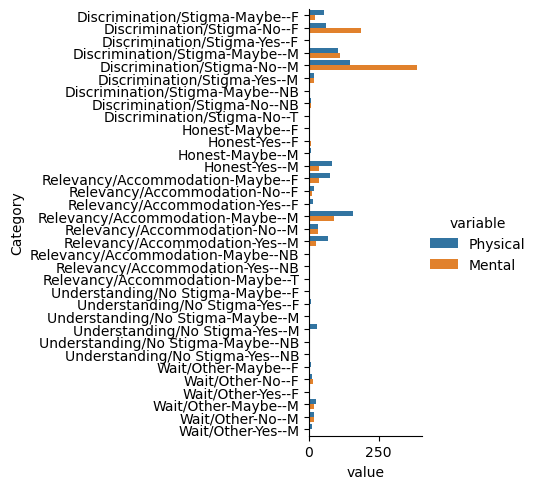

In [17]:
phyGroup_Gender = an.groupby(['Physical Category', 'Gender', an.iloc[:,36]]).size()

phyGG = phyGroup_Gender.to_frame()
phyGG = phyGG.reset_index()
phyGG = phyGG.rename(columns={'Physical Category': 'Category'})
phyGG['Category'] = phyGG['Category'].astype(str) + '-' + phyGG['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] + '--'+ phyGG['Gender']
phyGG = phyGG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(phyGG.head(50))

mentGG = an.groupby(['Mental Category', 'Gender', an.iloc[:,40]]).size()
mentGG = mentGG.to_frame()
mentGG = mentGG.reset_index()
mentGG = mentGG.rename(columns={'Mental Category': 'Category'})
mentGG['Category'] = mentGG['Category'].astype(str) + '-' + mentGG['Would you bring up a mental health issue with a potential employer in an interview?'] + '--' + mentGG['Gender']
mentGG = mentGG.drop(['Would you bring up a mental health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(mentGG.head(50))

resultGG = pd.merge(phyGG, mentGG, how='left',  on="Category")
resultGG = resultGG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultGG.fillna(0, inplace=True) 
resultGG = resultGG.astype({'Mental':int})
# print(resultGG.head(60))

resGG = pd.melt(resultGG, id_vars = "Category")
print(resGG)

axGG = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resGG, 
            kind='bar')
plt.show()



##### Gender Omission

c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


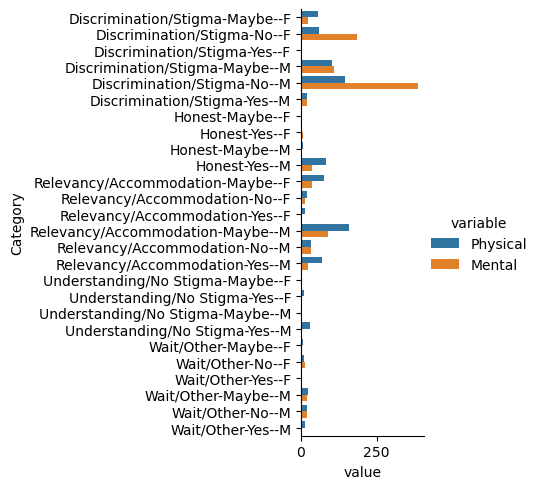

In [9]:
phyGroup_Gender = an.groupby(['Physical Category', 'Gender', an.iloc[:,36]]).size()

phyGG = phyGroup_Gender.to_frame()
phyGG = phyGG.reset_index()
phyGG = phyGG.rename(columns={'Physical Category': 'Category'})
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'NB'].index)
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'T'].index)
phyGG['Gender'].unique()
phyGG.head(50)
phyGG['Category'] = phyGG['Category'].astype(str) + '-' + phyGG['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] + '--'+ phyGG['Gender']
phyGG = phyGG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(phyGG.head(50))

mentGG = an.groupby(['Mental Category', 'Gender', an.iloc[:,40]]).size()
mentGG = mentGG.to_frame()
mentGG = mentGG.reset_index()
mentGG = mentGG.rename(columns={'Mental Category': 'Category'})
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'NB'].index)
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'T'].index)
mentGG['Gender'].unique()
mentGG['Category'] = mentGG['Category'].astype(str) + '-' + mentGG['Would you bring up a mental health issue with a potential employer in an interview?'] + '--' + mentGG['Gender']
mentGG = mentGG.drop(['Would you bring up a mental health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(mentGG.head(50))

resultGG = pd.merge(phyGG, mentGG, how='left',  on="Category")
resultGG = resultGG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultGG.fillna(0, inplace=True) 
resultGG = resultGG.astype({'Mental':int})
# print(resultGG.head(60))

resGG = pd.melt(resultGG, id_vars = "Category")
# print(result1)

axGG = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resGG, 
            kind='bar')
# plt.show()




c:\Users\tyler\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


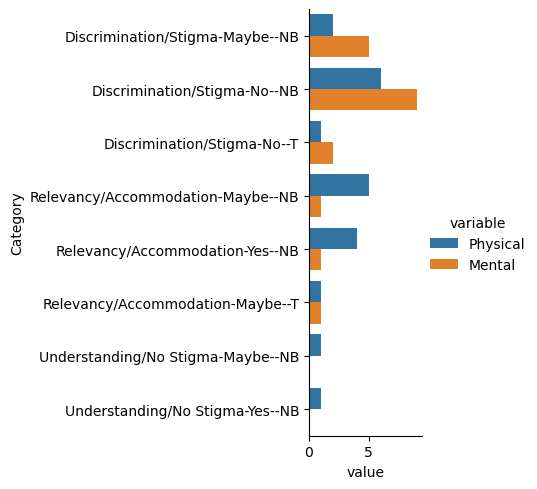

In [10]:
phyGroup_Gender = an.groupby(['Physical Category', 'Gender', an.iloc[:,36]]).size()

phyGG = phyGroup_Gender.to_frame()
phyGG = phyGG.reset_index()
phyGG = phyGG.rename(columns={'Physical Category': 'Category'})
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'M'].index)
phyGG = phyGG.drop(phyGG[phyGG['Gender'] == 'F'].index)
# phyGG = phyGG.reset_index()
phyGG['Gender'].unique()
phyGG.head(50)
phyGG['Category'] = phyGG['Category'].astype(str) + '-' + phyGG['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] + '--'+ phyGG['Gender']
phyGG = phyGG.drop(['Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(phyGG.head(50))

mentGG = an.groupby(['Mental Category', 'Gender', an.iloc[:,40]]).size()
mentGG = mentGG.to_frame()
mentGG = mentGG.reset_index()
mentGG = mentGG.rename(columns={'Mental Category': 'Category'})
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'M'].index)
mentGG = mentGG.drop(mentGG[mentGG['Gender'] == 'F'].index)
# mentGG = mentGG.reset_index()
mentGG['Gender'].unique()
mentGG['Category'] = mentGG['Category'].astype(str) + '-' + mentGG['Would you bring up a mental health issue with a potential employer in an interview?'] + '--' + mentGG['Gender']
mentGG = mentGG.drop(['Would you bring up a mental health issue with a potential employer in an interview?', 'Gender'], axis=1)
# print(mentGG.head(50))

resultGG = pd.merge(phyGG, mentGG, how='left',  on="Category")
resultGG = resultGG.rename(columns={'0_x':'Physical', '0_y':'Mental'})
resultGG.fillna(0, inplace=True) 
resultGG = resultGG.astype({'Mental':int})
# print(resultGG.head(60))

resGG = pd.melt(resultGG, id_vars = "Category")
# print(result1)

axGG = sns.catplot(x = 'value', y='Category', 
            hue = 'variable',data=resGG, 
            kind='bar')
plt.show()




In [11]:
fig = px.box(an, x="Gender", y='Number of current Mental health condition')
 
fig.show()
# fig = px.pie(an, values='How willing would you be to share with friends and family that you have a mental illness?', names=x ) 
 
# # showing the plot
# fig.show()

In [12]:
fig = px.box(an, x="Gender", y='Number of believed Mental health condition')
 
fig.show()

In [13]:
fig = px.box(an, x="Gender", y='Number of diagnosed Mental health condition')
 
fig.show()

In [14]:
an['Physical Category'].unique()

array([nan, 'Relevancy/Accommodation', 'Honest', 'Discrimination/Stigma',
       'Wait/Other', 'Understanding/No Stigma'], dtype=object)